#Analisis Accidentes de transito

El siguiente analisis se basa en la extracción y manipulación de datos de un dataset enfocado en la accidentalidad de vehiculos. Con esto se busca identificar algun tipo de tendencia o resolver algunas preguntas que puedan ir surgiendo.

Este analisis se hace a modo de autoestudio con el fin de fianzar habilidades de python y sus librerias

Elaborado por: *Luis Felipe Sanchez Sanchez*

[Fuente de dataset](https://www.kaggle.com/datasets/oktayrdeki/traffic-accidents)

##Conectamos a google drive

In [ ]:
#conectamos a google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importamos librerias y dataset

In [ ]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#leermos el archivo cvs
df = pd.read_csv('/content/drive/MyDrive/Ejecicios de practica/Analisis-Accidentes-Trafico-PH/traffic_accidents.csv')

In [ ]:
df

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,09/13/2023 01:08:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10
209304,06/01/2020 03:23:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6


##Manipulación de datos

In [ ]:
df.head(3)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12


In [ ]:
df.dtypes

,0
crash_date,object
traffic_control_device,object
weather_condition,object
lighting_condition,object
first_crash_type,object
trafficway_type,object
alignment,object
roadway_surface_cond,object
road_defect,object
crash_type,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

##Limpieza de datos

In [ ]:
#Validamos archivos nulos en el df
df.isnull().sum()

,0
crash_date,0
traffic_control_device,0
weather_condition,0
lighting_condition,0
first_crash_type,0
trafficway_type,0
alignment,0
roadway_surface_cond,0
road_defect,0
crash_type,0


In [ ]:
df.isna()
#No se evidencia ningun archivo faltante, por lo que se puede trabajar sin problema sobre el

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209302,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209303,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209304,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.duplicated()
#No se evidencia ningun archivo duplicado, por lo que se puede trabajar sin problema sobre el

,0
0,False
1,False
2,False
3,False
4,False
...,...
209301,False
209302,False
209303,False
209304,False


In [ ]:
df.dtypes

,0
crash_date,object
traffic_control_device,object
weather_condition,object
lighting_condition,object
first_crash_type,object
trafficway_type,object
alignment,object
roadway_surface_cond,object
road_defect,object
crash_type,object


##Analisis de datos

In [ ]:
#validamos el describe de las columnas crash_hour y crash_month
a=df['crash_month'].describe()
b=df['crash_hour'].describe()
c=df['crash_day_of_week'].describe()

print(a,b,c)

count    209306.000000
mean          6.771822
std           3.427593
min           1.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          12.000000
Name: crash_month, dtype: float64 count    209306.000000
mean         13.373047
std           5.603830
min           0.000000
25%           9.000000
50%          14.000000
75%          17.000000
max          23.000000
Name: crash_hour, dtype: float64 count    209306.000000
mean          4.144024
std           1.966864
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max           7.000000
Name: crash_day_of_week, dtype: float64


In [ ]:
#Hacemos un conteo de la totalidad de registro en condiciones climaticas
df['weather_condition'].value_counts()

,count
weather_condition,
CLEAR,164700
RAIN,21703
CLOUDY/OVERCAST,7533
SNOW,6871
UNKNOWN,6534
OTHER,627
FREEZING RAIN/DRIZZLE,510
FOG/SMOKE/HAZE,360
SLEET/HAIL,308


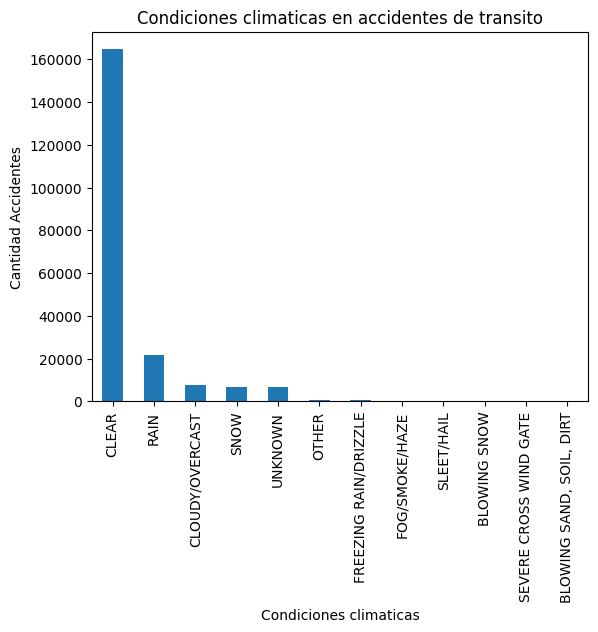

In [ ]:
#Que tanto afecta la condicion climatica en los accidentes de transito
df['weather_condition'].value_counts().plot(kind='bar')
plt.title('Condiciones climaticas en accidentes de transito')
plt.xlabel('Condiciones climaticas')
plt.ylabel('Cantidad Accidentes')
plt.show()

In [ ]:
#En cuanto a las condiciones de luz, que porcentaje se dio en cada uno
df['lighting_condition'].value_counts()

,count
lighting_condition,
DAYLIGHT,134109
"DARKNESS, LIGHTED ROAD",53378
DARKNESS,7436
DUSK,6323
UNKNOWN,4336
DAWN,3724


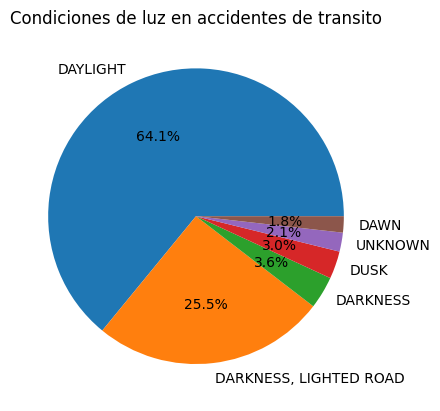

In [ ]:
plt.pie(df['lighting_condition'].value_counts(), labels=df['lighting_condition'].value_counts().index, autopct='%1.1f%%')
plt.title('Condiciones de luz en accidentes de transito')
plt.show()

In [ ]:
#Si deseamos conocer datos sobre el año del accidente, debemos separalo de la columna crash_Date
df['AñoLanzamiento1'] = df['crash_date'].str.split('/').str[2].str.split().str[0]
df['AñoLanzamiento1']

,AñoLanzamiento1
0,2023
1,2023
2,2021
3,2023
4,2023
...,...
209301,2023
209302,2023
209303,2019
209304,2020


In [ ]:
df

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,AñoLanzamiento1
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7,2023
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8,2023
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12,2021
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8,2023
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,09/13/2023 01:08:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9,2023
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7,2023
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10,2019
209304,06/01/2020 03:23:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6,2020


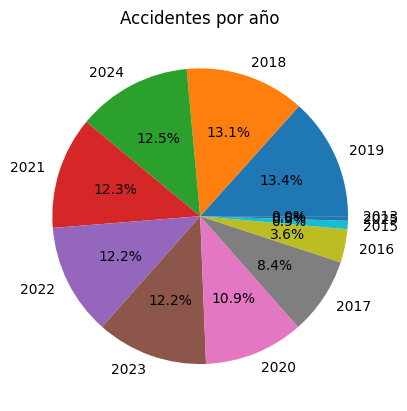

In [ ]:
plt.pie(df['AñoLanzamiento1'].value_counts(), labels=df['AñoLanzamiento1'].value_counts().index, autopct='%1.1f%%')
plt.title('Accidentes por año')
plt.show()

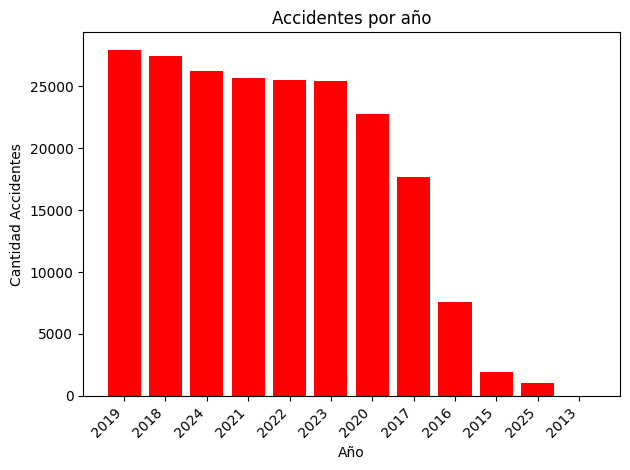

In [ ]:
#Cuantos accidentes suceden por año
plt.bar(df['AñoLanzamiento1'].value_counts().index, df['AñoLanzamiento1'].value_counts(), color='r') # Pass both x and height to plt.bar
plt.title('Accidentes por año')
plt.xlabel('Año')
plt.ylabel('Cantidad Accidentes')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

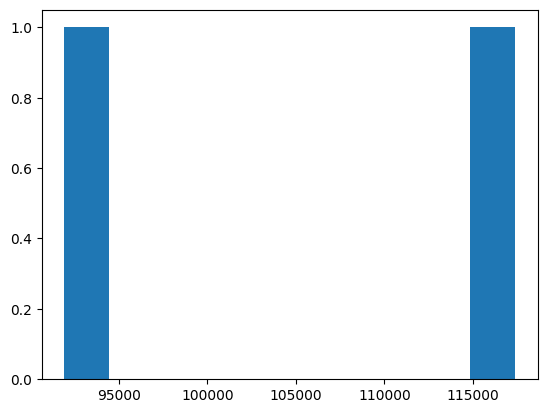

In [ ]:
#Que tipo de accidente es el mas comun
plt.hist(df['crash_type'].value_counts())
plt.show()

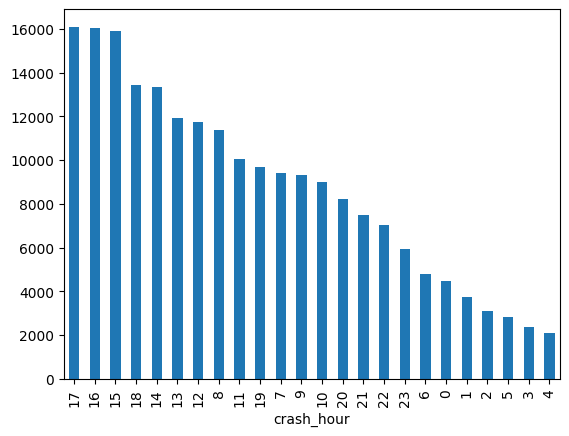

In [ ]:
#cuales son las horas donde mas se accidentan las personas
df['crash_hour'].value_counts().plot(kind='bar')
plt.show()

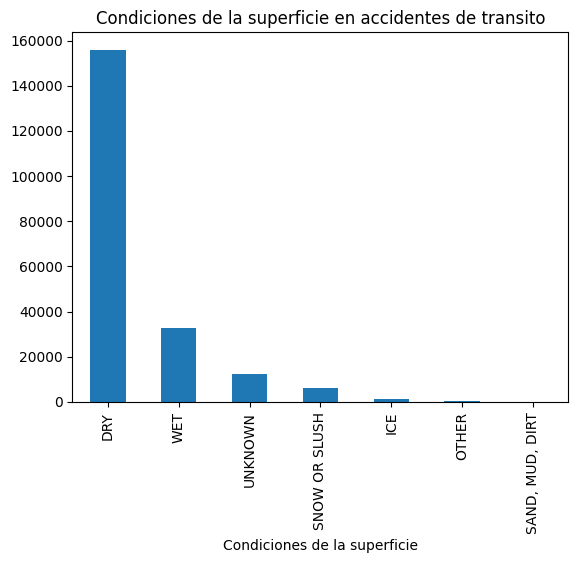

In [ ]:
#Condicion de la superficie y su impacto con los accidentes
df['roadway_surface_cond'].value_counts().plot(kind='bar')
plt.title('Condiciones de la superficie en accidentes de transito')
plt.xlabel('Condiciones de la superficie')
plt.show()

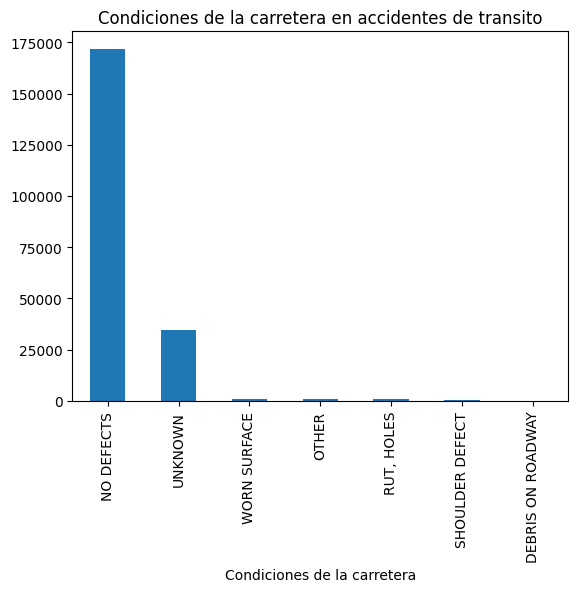

In [ ]:
#Como afentan las condiciones de la carretera en los accidentes
df['road_defect'].value_counts().plot(kind='bar')
plt.title('Condiciones de la carretera en accidentes de transito')
plt.xlabel('Condiciones de la carretera')
plt.show()

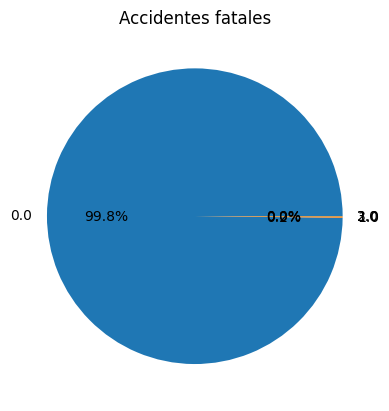

In [ ]:
#cual es el % de lesiones fatales en los accidentes
df['injuries_fatal'].value_counts()
plt.pie(df['injuries_fatal'].value_counts(), labels=df['injuries_fatal'].value_counts().index, autopct='%1.1f%%')
plt.title('Accidentes fatales')
plt.show()

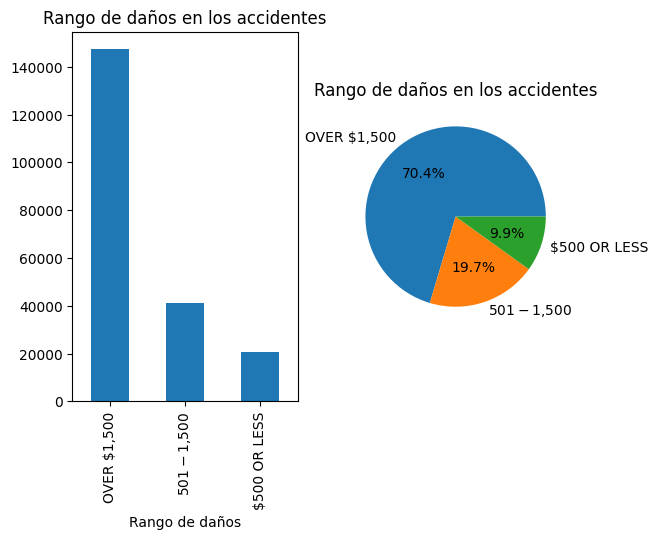

In [ ]:
#rango de daños en los accidentes
plt.subplot(1,2,1)
df['damage'].value_counts().plot(kind='bar')
plt.title('Rango de daños en los accidentes')
plt.xlabel('Rango de daños')
plt.subplot(1,2,2)
plt.pie(df['damage'].value_counts(), labels=df['damage'].value_counts().index, autopct='%1.1f%%')
plt.title('Rango de daños en los accidentes')
plt.show()



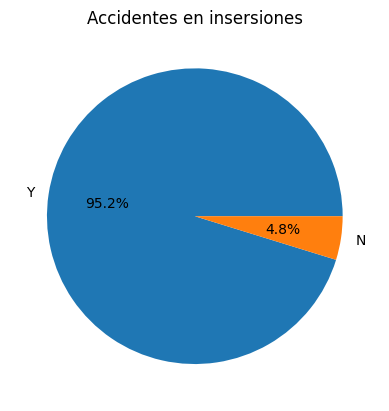

In [ ]:
#cuantos accidentes se dan en insersiones
plt.pie(df['intersection_related_i'].value_counts(), labels=df['intersection_related_i'].value_counts().index, autopct='%1.1f%%') # Call plt.pie and pass the values and labels
plt.title('Accidentes en insersiones')
plt.show()

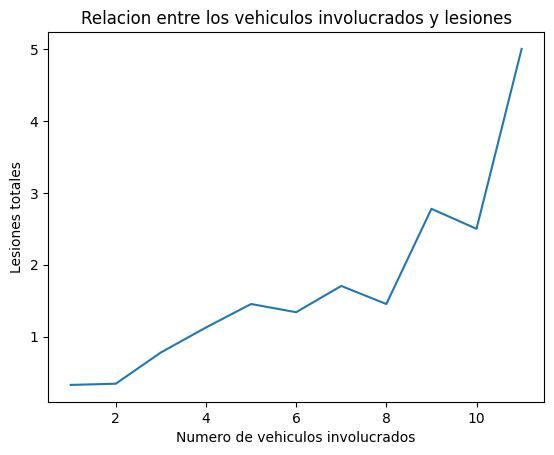

In [ ]:
#relacin entre los vehiculos involucrados y lesiones
accident_injuries = df.groupby('num_units')['injuries_total'].mean()
accident_injuries.plot(kind='line')
plt.title('Relacion entre los vehiculos involucrados y lesiones')
plt.xlabel('Numero de vehiculos involucrados')
plt.ylabel('Lesiones totales')
plt.show()


In [ ]:
df.head(3)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,AñoLanzamiento1
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7,2023
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8,2023
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12,2021


In [ ]:
# Extrae el mes de la fecha en formato 'MM/DD/YYYY HH:MM:SS AM/PM'
df['MesAccidente'] = df['crash_date'].str.split(' ').str[0].str.split('/').str[0]

# Muestra los primeros valores para verificar
df['MesAccidente']

,MesAccidente
0,07
1,08
2,12
3,08
4,08
...,...
209301,09
209302,07
209303,10
209304,06


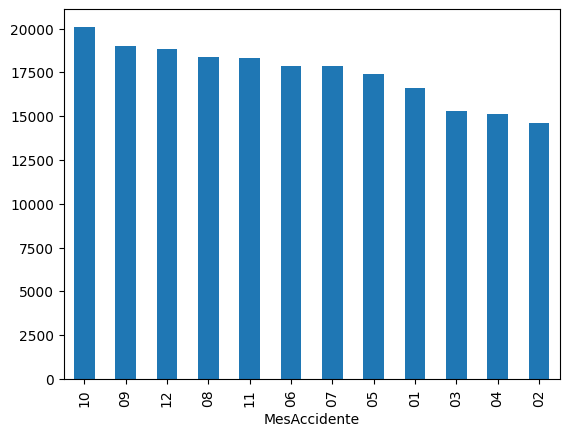

In [ ]:
#Cuales son los meses donde mas accidentes se presentan
df['MesAccidente'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df.head(3)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,AñoLanzamiento1,MesAccidente,JornadaAccidente
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,3.0,13,7,7,2023,PM,PM
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,2.0,0,1,8,2023,AM,AM
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,3.0,10,5,12,2021,AM,AM


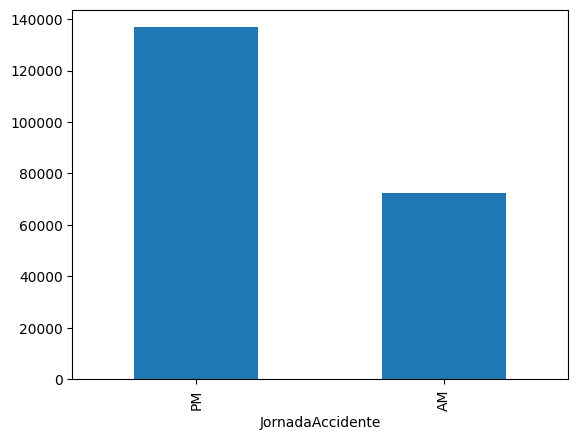

In [ ]:
#En que horario se presentan mas accidentes
df['JornadaAccidente'].value_counts().plot(kind='bar')
plt.show()

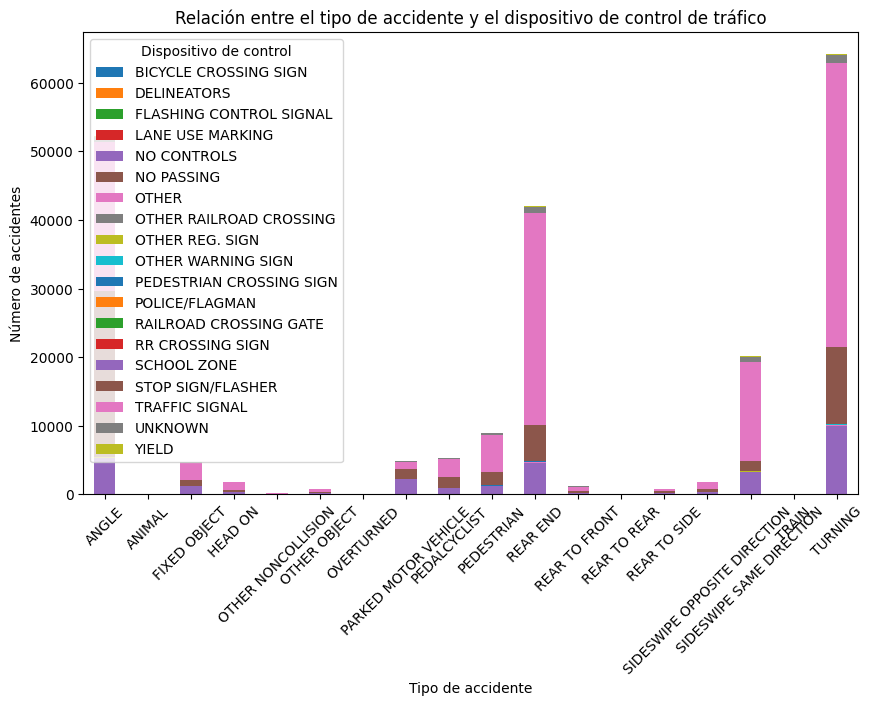

In [ ]:
import matplotlib.pyplot as plt

# Relaciona el tipo de accidente con el dispositivo de control de tráfico
crash_vs_traffic_device = df.groupby('first_crash_type')['traffic_control_device'].value_counts().unstack()

# Dibuja una gráfica de barras apiladas
crash_vs_traffic_device.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Relación entre el tipo de accidente y el dispositivo de control de tráfico')
plt.xlabel('Tipo de accidente')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.legend(title='Dispositivo de control')
plt.show()

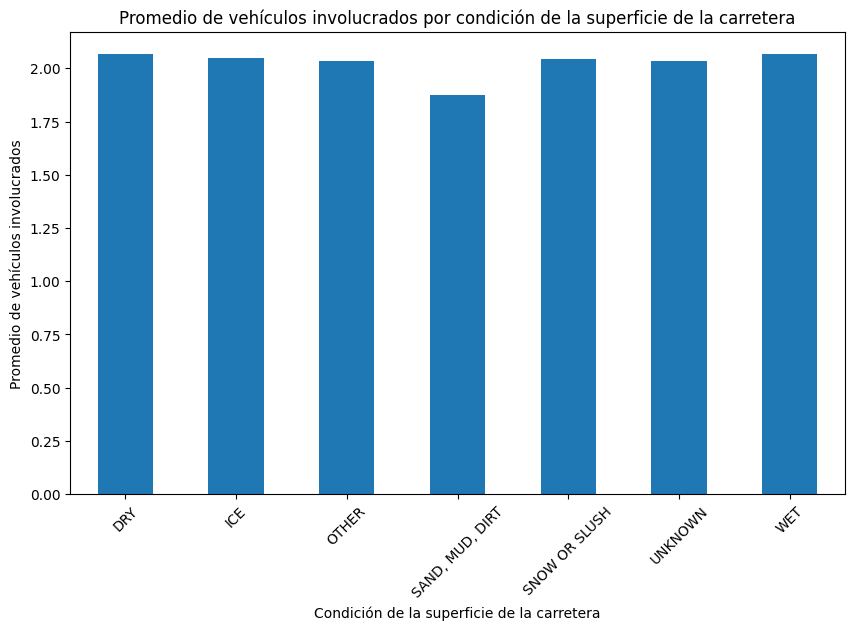

In [ ]:
#Relación entre el número de vehículos involucrados y el tipo de superficie de la carretera

# Relaciona el número de vehículos involucrados con las condiciones de la superficie de la carretera
vehicle_surface_condition = df.groupby('roadway_surface_cond')['num_units'].mean()

# Dibuja una gráfica de barras
vehicle_surface_condition.plot(kind='bar', figsize=(10,6))
plt.title('Promedio de vehículos involucrados por condición de la superficie de la carretera')
plt.xlabel('Condición de la superficie de la carretera')
plt.ylabel('Promedio de vehículos involucrados')
plt.xticks(rotation=45)
plt.show()